# Exercise: Supervised learning

In this exercise, you will be given two data sets, each of which you are to use to calculate a supervised learning model.


## Task 1: Tumor Classification using K-Nearest Neighbors (KNN)
Classify tumors as **Benign** or **Malignant** based on patient characteristics using **K-Nearest Neighbors (KNN)**.

1. **Preprocessing**
   - Encode categorical variables (`Gender`, `Location`, `Histology`, etc.).
   - Scale numerical features (`Age`, `Tumor_Size`, `Tumor_Growth_Rate`).
   - Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
   - Train a **K-Nearest Neighbors (KNN) classifier** to predict `Tumor_Type` (`Benign` or `Malignant`).
   - Perform **hyperparameter tuning** to find the best `k`.

3. **Model Evaluation**:
   - Plot the **confusion matrix** and **classification report**.
   - Compare accuracy for different values of `k` using a **line plot**.

Question: Based on your accuracy values, would you say that the model is suitable for making reliable classifications about benign and malignant tumors.




In [2]:
import pandas as pd

df = pd.read_csv('brain_tumor_dataset.csv')

In [3]:
#1.1
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=["object", "category"]).columns
df_categorical = df[categorical_cols]

label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [5]:
#1.2
from sklearn.preprocessing import StandardScaler

numerical_cols = ["Age", "Tumor_Size", "Tumor_Growth_Rate"]

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [6]:
#1.3
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Tumor_Type"])
y = df["Tumor_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (16000, 18) (16000,)
Test Set Shape: (4000, 18) (4000,)


In [7]:
#2.1
# Model Implementation: Train a K-Nearest Neighbors (KNN) classifier to predict Tumor_Type (Benign or Malignant).
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.51325
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1994
           1       0.51      0.52      0.52      2006

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



In [8]:
#2.2
from sklearn.linear_model import Ridge

alphas = [0.1, 1, 10, 100, 1000, 10000]
ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)

print(ridge_scores)

[-0.00043958708620861486, -0.00043951067979275393, -0.0004387491827297918, -0.0004313824424482249, -0.00037617272940226876, -0.0002451077378611277]


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": [0.1, 1, 10, 100, 1000, 10000]}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_["alpha"]
best_score = grid_search.best_score_

print(best_alpha, best_score)

10000 -0.00019562637485810442


In [10]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

ridge_test_score = ridge.score(X_test, y_test)
print(ridge_test_score)

-0.0002451077378611277


In [11]:
#3.1
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

[[1340  654]
 [1280  726]]
              precision    recall  f1-score   support

           0       0.51      0.67      0.58      1994
           1       0.53      0.36      0.43      2006

    accuracy                           0.52      4000
   macro avg       0.52      0.52      0.50      4000
weighted avg       0.52      0.52      0.50      4000



In [12]:
print(len(X_train))

16000


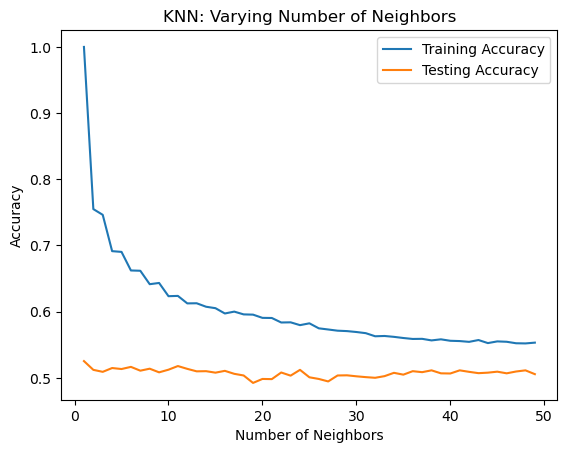

In [13]:
#3.2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 50)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Task 2
The goal of this exercise is to predict **Life Expectancy** (`Life expectancy`) based on various health, economic, and demographic factors using **Linear Regression**. The model should be optimized using **Ridge and Lasso Regression**.

1. **Preprocessing**
- Remove irrelevant columns (`Country`, `Year`).
- Encode categorical variables (`Status`).
- Handle missing values appropriately.
- Standardize numerical features (e.g., `GDP`, `Schooling`, `Alcohol`) using `StandardScaler`.
- Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
- Train a **basic Linear Regression** model and evaluate its performance.
- Implement **Ridge Regression** and **Lasso Regression**, tuning the `alpha` hyperparameter using **cross-validation**.

3. **Model Evaluation**:
- Compute the **Root Mean Squared Error (MSE)** for all models.
- Compare Ridge and Lasso performance to determine if regularization improves results.
- Plot **actual vs. predicted life expectancy** scores for each model.


In [10]:
df = pd.read_csv("Life Expectancy Data.csv")

In [21]:
#1.1
df = df.drop(columns=["Country", "Year"])

In [16]:
#1.2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Status"] = le.fit_transform(df["Status"])

In [17]:
#1.3
df = df.dropna()

In [18]:
#1.4
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [20]:
#1.5
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Life expectancy "])
y = df["Life expectancy "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#2.1
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [26]:
#2.2
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [0.1, 1, 10, 100, 1000]}
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

In [28]:
from sklearn.linear_model import Lasso
param_grid = {"alpha": [0.1, 1, 10, 100, 1000]}
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search_lasso.fit(X_train, y_train)
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

In [29]:
#3.1
from sklearn.metrics import mean_squared_error
import numpy as np
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(rmse_lr)
print(rmse_ridge)
print(rmse_lasso)

0.41715183703884123
0.4170143814318485
0.45766258405524946


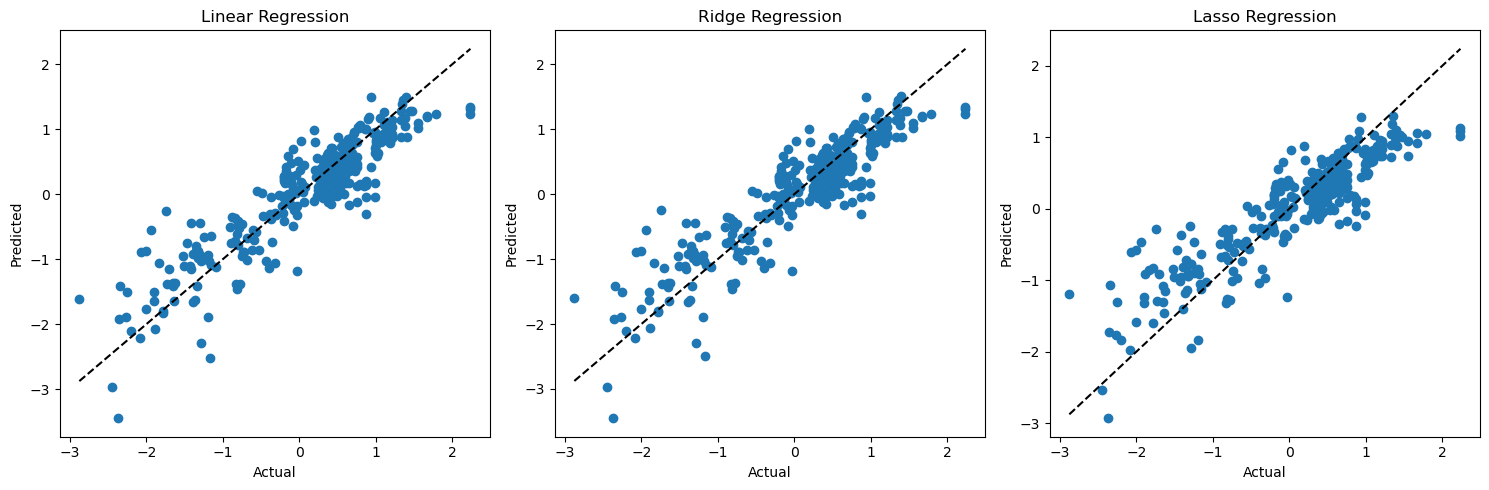

In [30]:
#3.2
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")

plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression")

plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Lasso Regression")

plt.tight_layout()
plt.show()